In [1]:
# Importing necessary packages
from tensorflow.keras.datasets import mnist
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Importing model
import activation_functions
from models import Sequential
from layers import Dense

2022-02-17 01:26:36.849210: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
# Getting data
data = mnist.load_data()

# Splitting to train and test
X_train = np.array(data[0][0]).reshape(-1, 784)[:1000, :] / 255
X_test = np.array(data[1][0]).reshape(-1, 784)[:300, :] / 255

y_train = OneHotEncoder().fit_transform(data[0][1].reshape(-1, 1))[:1000, :]
y_test = OneHotEncoder().fit_transform(data[1][1].reshape(-1, 1))[:300, :]

In [3]:
# Building model
model = Sequential(learning_rate=0.07, epochs=2)
model.add(Dense(128, activation_function=activation_functions.ReLU()))
model.add(Dense(64, activation_function=activation_functions.ReLU()))
model.add(Dense(10, activation_function=activation_functions.Softmax()))

In [4]:
# Fitting model
model.fit(X_train, y_train)

EPOCH 1
Accuracy: 0.454


EPOCH 2
Accuracy: 0.708




In [5]:
# Predictions
predictions = model.predict(X_test)

In [6]:
predictions.T[1].shape

(1, 10)

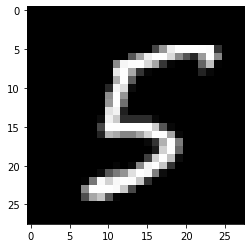

Prediction: 5


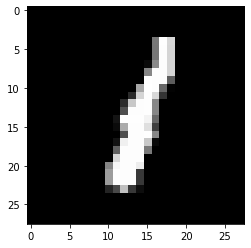

Prediction: 1


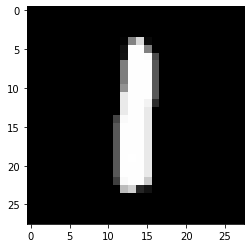

Prediction: 1


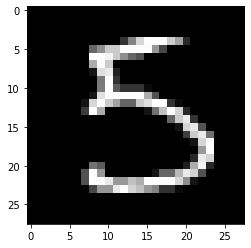

Prediction: 3


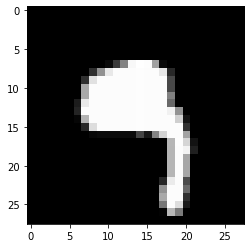

Prediction: 2


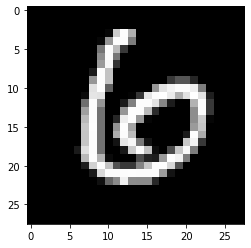

Prediction: 4


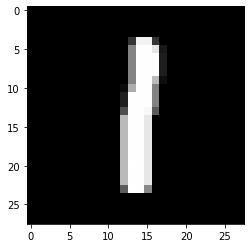

Prediction: 1


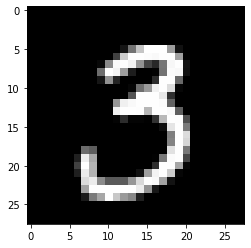

Prediction: 3


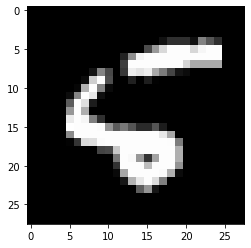

Prediction: 6


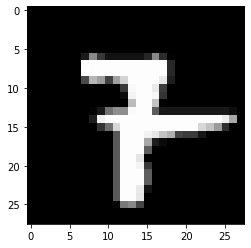

Prediction: 1


In [7]:
plt.gray()
for _ in range(10):
    random_no = np.random.randint(y_test.shape[0])
    plt.imshow(X_test[random_no].reshape(28, 28))
    plt.show()
    print(f"Prediction: {np.argmax(predictions.T[random_no])}")

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [9]:
p = np.argmax(predictions.T, axis=1)
yt = np.argmax(y_test, axis=1)
print(accuracy_score(p, yt))
confusion_matrix(p, yt)

0.6433333333333333


array([[19,  0,  1,  0,  0,  1,  1,  0,  0,  1],
       [ 0, 40,  6,  0,  0,  1,  0,  4,  1,  1],
       [ 3,  1, 15,  2,  2,  1,  1,  0,  0,  1],
       [ 0,  0,  3, 15,  0,  5,  0,  0,  5,  2],
       [ 1,  0,  0,  1, 22,  2,  3,  0,  0,  2],
       [ 0,  0,  1,  6,  0, 10,  1,  0,  1,  1],
       [ 0,  0,  0,  0,  5,  1, 16,  0,  2,  0],
       [ 0,  0,  1,  0,  5,  3,  0, 28,  3,  5],
       [ 1,  0,  4,  0,  0,  2,  2,  0,  8,  1],
       [ 0,  0,  1,  0,  3,  3,  0,  2,  1, 20]])